문제정의:
    지역의 주요 상권내 택시 통행량은 해당 지역의 교통 활동과 인구밀도 등을 반영하는 중요한 지표이다. 
    이 데이터를 클러스터링하여 상권내의 인구 이동 특징과, 교통 수요 특성을 파악하고, 각 클러스터의 특징을 이해하여 교통 정책 수립에 도움을 주고자 한다.

        분석 목적:
            1. 택시 통행량을 기반으로 한 클러스터링을 통해 지역 상권의 교통 수요 패턴의 유사성을 파악하고자 한다.
            2. 각 클러스터의 특성을 파악하여 교통 수요의 불균형과 도로 환경의 상관 관계를 분석한다.
            3. 특정 지역의 교통 수요 특성을 파악하여 해당 지역의 교통 인프라 개선이나 교통 정책 수립에 도움을 준다.

        예상결과:
            1. 클러스터의 특성 분석을 통해, 교통 수요의 불균형 정도를 확인하고, 각 지역의 교통 활동 패턴을 이해할 수 있을 것 같다.
            2. 높은 택시 통행량을 가진 지역은 번화한 교통 활동을 나타내며, 이는 도심 지역이나 상업 중심지로 해석될 수 있을 것 같으며, 
               택시 통행량이 적은 지역은 일정한 교통 활동량을   보이는 지역으로 해석될 수 있으며. 이는 주거지나 비번화된 지역을 나타낸다고 예측할 수 있을 것 같다.
            3. 특정 클러스터의 특성을 파악하여 해당 지역의 교통 정책을 개선하거나 적합한 교통 인프라를 구축하는 데 도움이 될 것으로 예상된다.

데이터 선택:
    주요 상권별 택시통행량 정보 (https://www.data.go.kr/data/54840997/linkedData.do)

    데이터 구조:
            TRDAR_NO (상권번호)
            TRDAR_NM (상권명)
            SIGNGU_CD (시군구코드)
            SIGNGU_NM (시군구명)
            LINK_CNT (인근도로수)
            MINM_TXTR (평균 택시통행량 중 최솟값)
            MAX_TXTR (평균 택시통행량 중 최댓값)
            AVE_TXTR (평균 택시통행량의 평균값)
            + DIFF_TXTR (MAX_TXTR - AVE_TXTR) 추가한 데이터로 택시 통행량의 최댓값과 평균값 사이의 차이값이다
    
    선택한 데이터셋의 구조와 해당 데이터가 문제 해결에 어떻게 도움이 될 수 있는지 설명하세요:
        이 데이터셋은 평균 택시 통행량에 관한 여러 가지 지표를 담고 있다. 이러한 지표를 통해 각 지역의 택시 이용량에 대한 다양한 정보를 파악할 수 있다. 
        예를 들어, 평균 택시 통행량의 최솟값과 최댓값을 비교하여 해당 지역의 택시 이용량의 범위를 확인할 수 있으며, 평균 택시 통행량의 평균값을 통해 해당 지역의 전반적인 
        택시 이용 패턴을 이해할 수 있다. 추가적으로 DIFF_TXTR 열을 생성하여 택시 통행량의 최댓값과 평균값 사이의 차이를 확인할 수 있다. 
        이를 통해 특정 지역의 교통 활동의 불균형 정도를 파악할 수 있다.          

In [174]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# 데이터를 불러와 DataFrame으로 저장
df = pd.read_csv("./PRDTF_202309111120529373.csv", encoding='cp949')

# DataFrame의 처음 5개 행 출력
df.head()

,TRDAR_NO,TRDAR_NM,SIGNGU_CD,SIGNGU_NM,LINK_CNT,MINM_TXTR,MAX_TXTR,AVE_TXTR,DIFF_TXTR
0,10000,지행역,41250,동두천시,60,54.9,1941.8,466.0,1475.8
1,10001,전곡터미널,41800,연천군,98,0.2,223.0,43.8,179.2
2,10002,가능역,41150,의정부시,65,16.0,1039.0,343.3,695.7
3,10003,경기도청북부청사역_1,41150,의정부시,105,1.9,518.4,89.4,429.0
4,10004,경기도청북부청사역_2,41150,의정부시,103,11.5,1015.4,139.8,875.6


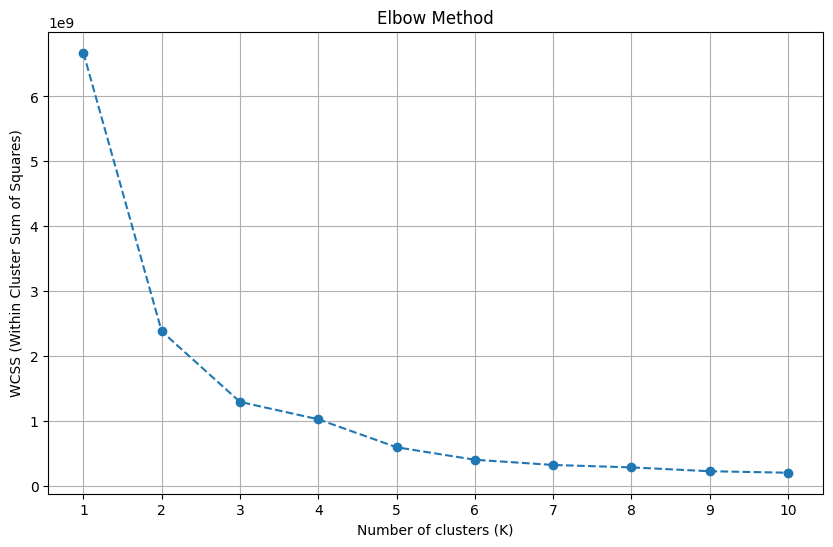

In [171]:
from sklearn.cluster import KMeans

# 최대 클러스터 수 설정
max_clusters = 10
wcss = []

# K 값을 1부터 최대 클러스터 수까지 변경하면서 WCSS 값을 계산
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df[['MAX_TXTR', 'DIFF_TXTR']])
    wcss.append(kmeans.inertia_)

# WCSS 값을 그래프로 나타내기
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.xticks(range(1, max_clusters + 1))
plt.grid(True)
plt.show()

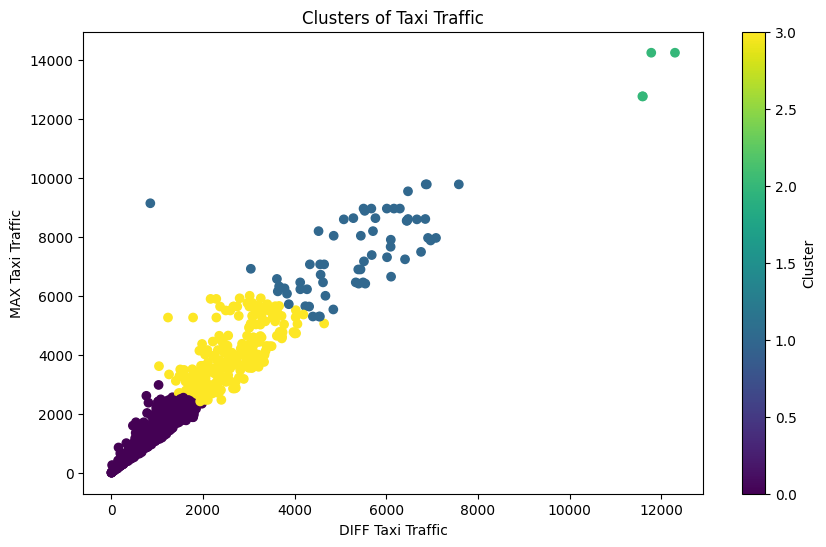

In [172]:
# 결정된 K 값으로 K-means 알고리즘을 초기화하고 클러스터링을 수행
k = 4
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans.fit(df[['DIFF_TXTR', 'MAX_TXTR']])
labels = kmeans.labels_

# 클러스터링 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(df['DIFF_TXTR'], df['MAX_TXTR'], c=labels, cmap='viridis')
plt.title('Clusters of Taxi Traffic')
plt.xlabel('DIFF Taxi Traffic')
plt.ylabel('MAX Taxi Traffic')
plt.colorbar(label='Cluster')
plt.show()

클러스터 0 (보라색 지점) :
DIFF_TXTR 값이 작고 MAX_TXTR 값이 상대적으로 작은 소규모 상권 지역들이 이 클러스터에 속한다.
이 클러스터는 타 상권에 비해 택시 통행량이 현저히 적으며, 인구 밀집이 낮은 지역으로 유추할 수 있다. 이는 교통량이 적은 주거 지역 또는 비번화된 소규모 상권 지역으로 해석할 수 있다.

클러스터 1 (노란색 지점):
DIFF_TXTR 값과 MAX_TXTR 값이 상이한 지역들이 이 클러스터에 속한다.
이 클러스터는 일정한 택시 통행량을 보여주며, 이는 인구의 이동이 타 지역의 비해 온건하다는 것을 의미한다. 이 지역들은 주거 지역내 중소규모 번화가로 해석할 수 있다.

클러스터 2 (파란색 지점):
DIFF_TXTR 값도 이전 클러스터의 비해 크지만 MAX_TXTR값이 상대적으로 큰 지역들이 이 클러스터에 속한다.
평균적 택시 통행량도 많은 편이지만, 택시 최대 통행량이 많은 상권 지역으로 출퇴근과 같은 특정 시간에 택시 수요가 늘어나며 교통이 혼잡해지는 교통체증이 일어나는 상업지구 또는 회사 밀집 지역으로 해석할 수 있다.

클러스터 3 (초록색 지점):
DIFF_TXTR 값이 크고 MAX_TXTR도 큰 상권으로 항상 복잡하고 인구가 밀집해 있는 지역으로 해석할 수 있다. 도내에서 가장 큰 번화가로 인프라가 밀집해 있으며 교통의 주요 거점지가 인접해 있는
상권 지역으로 도로가 차량의 통행을 충분히 수요하지 못하며, 택시 수요가 항상 높으며 다른 교통이 항상 혼잡한 지역으로 해석할 수 있다.

In [169]:
from sklearn.metrics import silhouette_score

# 실루엣 점수 계산
silhouette_avg = silhouette_score(df[['MAX_TXTR','DIFF_TXTR']], labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.6225723612311661


실루엣 점수는 군집 안에 있는 데이터들은 잘 모여있는지, 군집끼리는 서로 잘 구분되는지 클러스터링을 평가하는 척도로 활용된다.
실루엣 점수는 -1에서 1 사이의 값을 가지며, 0에 가까운 경우는, 두 군집 간 거리가 거의 비슷한 경우를 의미하며 잘 구분되지 않은 상태이다.
-1에 가까운 경우는, 데이터 포인트 i가 오히려 이웃 클러스터에 더 가까운 경우를 의미하며 아예 잘못 할당된 상태라고 볼 수 있다.
일반적으로 실루엣 점수가 0.5보다 크다면 데이터의 클러스터링이 잘 되었다고 판단한다. 따라서 해당 실루엣 점수가 0.6225로 나왔으므로 상당히 
좋은 클러스터링 결과를 보여주고 있다고 판단할 수 있다. 이는 클러스터 간의 거리가 상대적으로 멀고, 클러스터 내의 데이터 포인트가 밀접하게 모여 있음을 나타낸다.